In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mt
import seaborn as sb
from sklearn.linear_model import LinearRegression
sb.set()

In [111]:
raw_data = pd.read_csv('D:\\Data Science\\Datasets\\Datasets\\CarsSalesData.csv')

In [116]:
raw_data.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [113]:
raw_data['Price'] = raw_data['Price'].fillna(raw_data['Price'].mean())

In [114]:
raw_data['EngineV'] = raw_data['EngineV'].fillna(raw_data['EngineV'].median())

In [115]:
raw_data.drop(['Model'], axis=1,inplace=True)

In [117]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4345.000000,4345.000000,4345.000000,4345.000000
mean,19418.746935,161.237284,2.770341,2006.550058
std,25072.625077,105.705797,4.979364,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,7100.000000,86.000000,1.900000,2003.000000
50%,11900.000000,155.000000,2.200000,2008.000000
75%,20900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [121]:
p=raw_data['Year'].quantile(0.01)
raw_data = raw_data[raw_data['Year']>p]

In [122]:
raw_data.reset_index(inplace=True, drop=True)

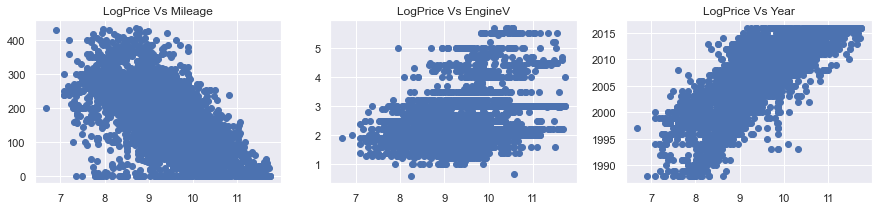

In [124]:
f,(a1,a2,a3) = mt.subplots(1,3, figsize=(15,3))
a1.scatter(raw_data['LogPrice'],raw_data['Mileage'])
a1.set_title('LogPrice Vs Mileage')
a2.scatter(raw_data['LogPrice'],raw_data['EngineV'])
a2.set_title('LogPrice Vs EngineV')
a3.scatter(raw_data['LogPrice'],raw_data['Year'])
a3.set_title('LogPrice Vs Year')
mt.show()

In [123]:
raw_data['LogPrice'] = np.log(raw_data['Price'])

<AxesSubplot:>

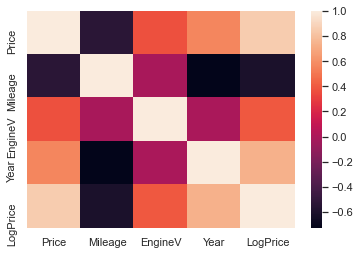

In [49]:
sb.heatmap(raw_data.corr())

In [125]:
raw_data['Registration'] = raw_data['Registration'].map({'yes':1,'no':0})

In [126]:
brand_dummies = pd.get_dummies(raw_data['Brand'])
body_dummies = pd.get_dummies(raw_data['Body'])
etype_dummies = pd.get_dummies(raw_data['Engine Type'])

In [127]:
raw_data = pd.concat([raw_data,brand_dummies, body_dummies, etype_dummies], axis=1)
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,LogPrice,Audi,...,crossover,hatch,other,sedan,vagon,van,Diesel,Gas,Other,Petrol
0,BMW,4200.0,sedan,277,2.0,Petrol,1,1991,8.342840,0,...,0,0,0,1,0,0,0,0,0,1
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1,1999,8.974618,0,...,0,0,0,0,0,1,1,0,0,0
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,1,2003,9.495519,0,...,0,0,0,1,0,0,0,1,0,0
3,Audi,23000.0,crossover,240,4.2,Petrol,1,2007,10.043249,1,...,1,0,0,0,0,0,0,0,0,1
4,Toyota,18300.0,crossover,120,2.0,Petrol,1,2011,9.814656,0,...,1,0,0,0,0,0,0,0,0,1


In [146]:
raw_data.drop(['Other','other'],inplace=True, axis=1)

In [147]:
data = raw_data.copy()

In [148]:
inputs = data.drop(['LogPrice'], axis=1)
output = data['LogPrice']

In [149]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [150]:
scaled_inputs = scaler.transform(inputs)

In [151]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, output, test_size=0.2, random_state=365)

In [152]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [153]:
reg.score(x_train, y_train)

0.8468166178832448

In [154]:
reg.predict(x_test)

array([ 9.09103878,  8.04416378,  9.33713253, 10.03439816,  9.23947628,
        8.00607785,  8.39865597,  9.70334347,  7.74924191,  9.14572628,
        8.5959216 , 10.07346066, 10.29611691,  9.41721066,  9.53146847,
        9.07541378,  8.23166378,  9.46603878,  9.35568722,  9.57150753,
        9.25900753,  9.92795285,  9.21115597,  7.84787472, 10.21408566,
        9.29025753,  8.07639035,  9.41037472, 10.33713253,  9.85471066,
       10.3615466 ,  8.50900753,  9.59103878,  8.94162472, 10.43576535,
        8.67014035, 10.20920285,  9.82834347,  7.46799191,  9.44162472,
       10.91135128,  9.08322628,  9.70041378, 10.41232785,  9.94553097,
       10.58517941,  8.71896847,  8.35764035,  9.72775753,  9.18478878,
        9.45334347,  9.0646716 ,  9.52658566,  9.84201535,  8.55295285,
        9.06955441,  8.7834216 ,  8.47287472, 10.48459347,  9.14084347,
        9.91037472,  8.76584347,  9.04709347,  9.74045285, 10.26193722,
        8.05197628,  9.24045285, 10.05783566,  8.72287472,  9.45

In [155]:
inputs.head()

,Mileage,EngineV,Registration,Year,Audi,BMW,Mercedes-Benz,Mitsubishi,Renault,Toyota,Volkswagen,crossover,hatch,sedan,vagon,van,Diesel,Gas,Petrol
0,277,2.0,1,1991,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,427,2.9,1,1999,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
2,358,5.0,1,2003,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,240,4.2,1,2007,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,120,2.0,1,2011,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1


In [204]:
def predict_price(mileage, volume, registration, year, brand, body, engine):
    brand_index = np.where(brand==(data.columns))[0][0]-1
    body_index = np.where((body)==(data.columns))[0][0]-1
    etype_index = np.where((engine)==(data.columns))[0][0]-1
    x = np.zeros(len(inputs.columns))
    x[0] = mileage
    x[1] = volume
    x[2] = 1 if registration.upper()=='YES' else 0
    x[3] = year
    x[brand_index] = x[body_index] = x[etype_index] = 1
    xtoscale = x.reshape(1,19)
    x_scaled = scaler.transform(xtoscale)
    return np.exp(reg.predict(x_scaled)[0])

In [205]:
price = predict_price(21, 2, 'yes', 2013, 'Toyota', 'crossover', 'Petrol')
price

26626.749137211373

In [198]:
xtoscale = price.reshape(1,19)

In [177]:
brand_index = np.where('Toyota'==(data.columns))[0][0] - 1
body_index = np.where(('crossover')==(data.columns))[0][0] - 1
etype_index = np.where(('Petrol')==(data.columns))[0][0] - 1
brand_index

9

In [170]:
inputs.columns

Index(['Mileage', 'EngineV', 'Registration', 'Year', 'Audi', 'BMW',
       'Mercedes-Benz', 'Mitsubishi', 'Renault', 'Toyota', 'Volkswagen',
       'crossover', 'hatch', 'sedan', 'vagon', 'van', 'Diesel', 'Gas',
       'Petrol'],
      dtype='object')

In [184]:
x_test.shape

(829, 19)

In [199]:
xtoscale.shape

(1, 19)

In [207]:
import pickle
with open('D:\Data Science\Datasets\Datasets\Models\CarPricePredictionModel.pickle', 'wb') as f:
    pickle.dump(reg, f)

In [208]:
import json
Columns = {
    'data_cols': [c.lower() for c in inputs.columns]
}
with open('D:\Data Science\Datasets\Datasets\Models\Columns.json', 'w') as f:
    f.write(json.dumps(Columns))